# Importing Libraries


Things to do:
Change name of the recomeded
apply NLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #Regular Expressions
import string #importing string functions
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.stem.porter import PorterStemmer

# Used for ML/Deep Learning Algorithms

In [2]:
from tensorflow.keras.layers import Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM,Bidirectional,GRU,MaxPooling1D,Conv1D
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras import regularizers
from tensorflow.keras.callbacks import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

## Reading The Data

In [4]:
df = pd.read_csv("data.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [5]:
#here seprate rating and recommand ind from data and count recommend ind for 0 1 for each rating 

df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [6]:
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

Title                                        Review Text  \
0                      NaN  Absolutely wonderful - silky and sexy and comf...   
1                      NaN  Love this dress!  it's sooo pretty.  i happene...   
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [7]:
#here add title with review text for show a one label name Review

text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']
text_df = text_df.drop(labels=['Title','Review Text'] , axis=1)
text_df.head()

Recommended IND                                             Review
0                1                                                NaN
1                1                                                NaN
2                0  Some major design flaws I had such high hopes ...
3                1  My favorite buy! I love, love, love this jumps...
4                1  Flattering shirt This shirt is very flattering...

In [8]:
#swap Recommended IND with Recommended name

text_df = text_df.rename(columns={"Recommended IND": "Recommended"})

In [9]:
#chick for nan value in Review is 3811 nan value

text_df.Review.isna().sum()

3811

In [10]:
text_df.head()

Recommended                                             Review
0            1                                                NaN
1            1                                                NaN
2            0  Some major design flaws I had such high hopes ...
3            1  My favorite buy! I love, love, love this jumps...
4            1  Flattering shirt This shirt is very flattering...

In [11]:
#print shape of two columns Recommended and review

print("My data's shape is:", text_df.shape)
text_df.head()


My data's shape is: (23486, 2)


Recommended                                             Review
0            1                                                NaN
1            1                                                NaN
2            0  Some major design flaws I had such high hopes ...
3            1  My favorite buy! I love, love, love this jumps...
4            1  Flattering shirt This shirt is very flattering...

In [12]:
#here drop duplicates values in data

print("Before dropping text_df: ",text_df.shape)
text_df.drop_duplicates(inplace = True)
print("After dropping text_df: ",text_df.shape)

Before dropping text_df:  (23486, 2)
After dropping text_df:  (19673, 2)


In [13]:
text_df.head()

Recommended                                             Review
0            1                                                NaN
2            0  Some major design flaws I had such high hopes ...
3            1  My favorite buy! I love, love, love this jumps...
4            1  Flattering shirt This shirt is very flattering...
5            0  Not for the very petite I love tracy reese dre...

In [14]:
text_df.isnull().sum(axis=0).sort_values()

Recommended    0
Review         2
dtype: int64

In [15]:
text_df.dropna(inplace=True)
text_df.head()
print("After dropping NaN text_df: ",text_df.shape)

After dropping NaN text_df:  (19671, 2)


In [16]:
text_df['Recommended'].value_counts()

1    16096
0     3575
Name: Recommended, dtype: int64

<Axes: ylabel='Recommended'>

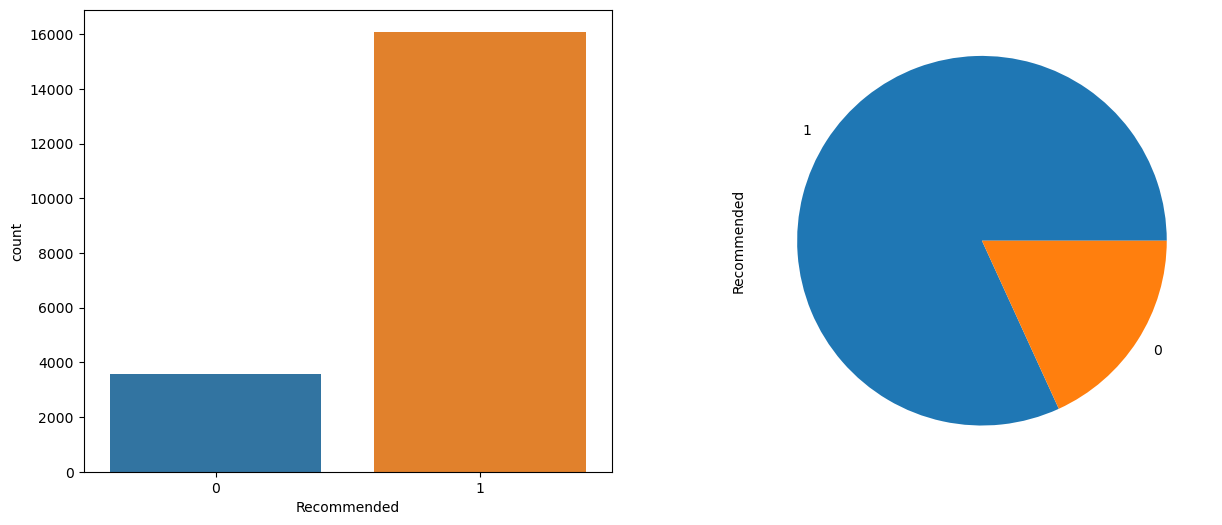

In [17]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=text_df['Recommended'])
plt.subplot(1, 2, 2)
text_df['Recommended'].value_counts().plot.pie(y='Class')

# Upsampling

In [18]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = text_df[(text_df['Recommended']==1)] 
df_minority = text_df[(text_df['Recommended']==0)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class
                                 random_state=42)  # reproducible resultes
                                 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<Axes: ylabel='Recommended'>

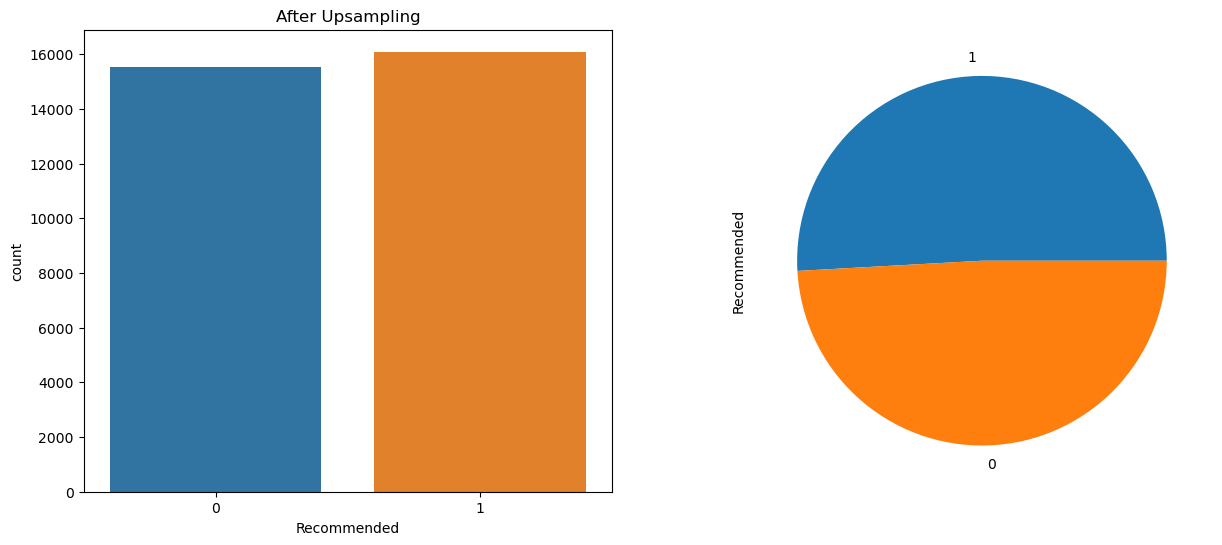

In [36]:
plt.figure(figsize = (15, 6))
ax=plt.subplot(1, 2, 1)
sns.countplot(x=df_upsampled['Recommended'])
ax.set_title('After Upsampling')
plt.subplot(1, 2, 2)
df_upsampled['Recommended'].value_counts().plot.pie(y='Class')

# Data Preprocessing

In [19]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [22]:
df_upsampled["Cleaned_Review"] = np.vectorize(remove_pattern)(df_upsampled["Review"], "@[\w]*")

In [23]:
#Remove special characters, numbers and punctuations
df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].str.replace("[^a-zA-Z#]", " ")
df_upsampled.head()

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   

                                          Cleaned_Review  
20700  Very large  lace is kinda coarse Thought i d l...  
23020  Way too much fabric I wanted to love this jump...  
5625   So surprised by the poor quality I loved the l...  
8695   Runs large I so wanted to love this tank  and ...  
7689   If you have a chest  beware I got this top in ...

In [24]:
#Removing short words (words with length less than 3)

df_upsampled["Cleaned_Review"] = df_upsampled["Cleaned_Review"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df_upsampled.head()

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   

                                          Cleaned_Review  
20700  Very large lace kinda coarse Thought love this...  
23020  much fabric wanted love this jumpsuit looks ad...  
5625   surprised poor quality loved look this sweater...  
8695   Runs large wanted love this tank excited mail ...  
7689   have chest beware this typical size medium wan...

# Tokenization

In [26]:
tokenized_tweet = df_upsampled["Cleaned_Review"].apply(lambda x: x.split())
tokenized_tweet.head()

20700    [Very, large, lace, kinda, coarse, Thought, lo...
23020    [much, fabric, wanted, love, this, jumpsuit, l...
5625     [surprised, poor, quality, loved, look, this, ...
8695     [Runs, large, wanted, love, this, tank, excite...
7689     [have, chest, beware, this, typical, size, med...
Name: Cleaned_Review, dtype: object

# Data Visualization

In [27]:
df["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

As shown in the above graph, Although more than 50% of customers rated "5" for the store's products, about more than 11% of customers were not satisfies by the products and voted for "1" and "2".

<Axes: ylabel='Rating'>

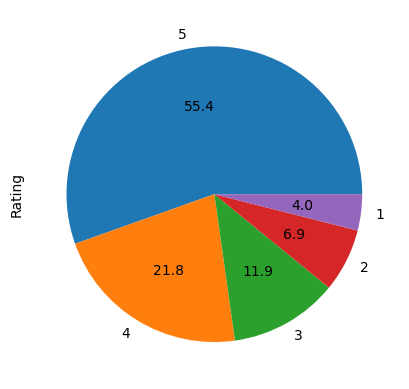

In [28]:
round(df['Rating'].value_counts()/df.shape[0]*100).plot.pie(autopct='%1.1f') 

In [29]:
df["Department Name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

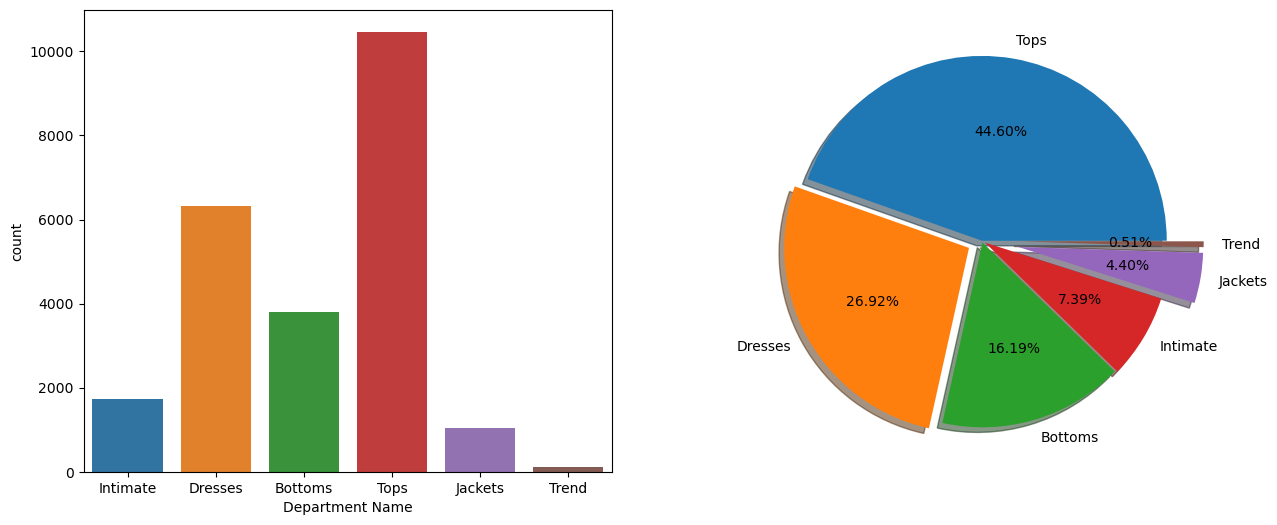

In [30]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Department Name'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')

plt.show()

Text(0.5, 1.0, 'Age Distribution')

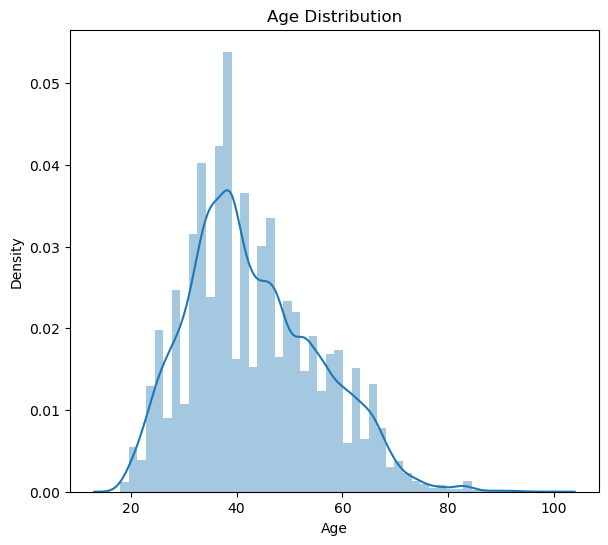

In [31]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Age_distribution')
sns.distplot(df['Age']).set_title("Age Distribution")

The majority of customers age between 30 and 50 yeare old.

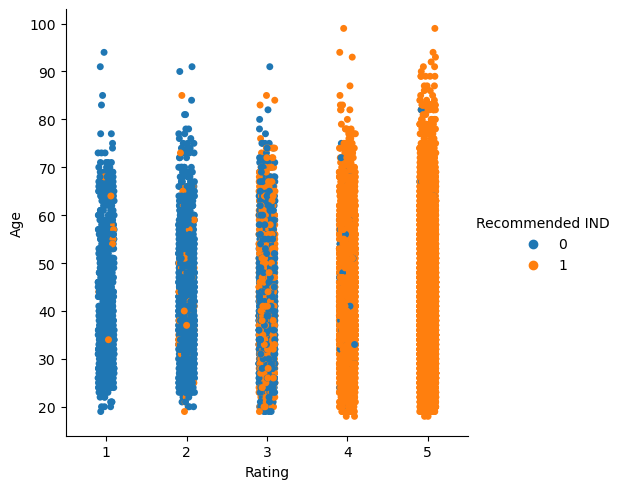

In [32]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

From this we can observe that review Ratings of 1 and 2 are not Recomended whereas 4 and 5 are recommended.

In [33]:
import plotly.express as px
FreqOfWords = df['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# Text Manipulation

In [34]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# -Noise Removal (Punctuation)

In [35]:
#this function use to remove punctuations
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

In [36]:
# processed_text=remove_punc(str(df["Review Text"]))
# processed_text
processed_text=remove_punc(str(df_upsampled["Cleaned_Review"]))
processed_text


'20700    Very large lace kinda coarse Thought love this\n23020    much fabric wanted love this jumpsuit looks ad\n5625     surprised poor quality loved look this sweater\n8695     Runs large wanted love this tank excited mail \n7689     have chest beware this typical size medium wan\n                                                       \n23479    What piece wasn sure about ordering this skirt\n23481    Great dress many occasions very happy snag thi\n23482    Wish made cotton reminds maternity clothes sof\n23484    Very cute dress perfect summer parties bought \n23485    Please make more like this This dress lovely p\nName Cleaned_Review Length 31635 dtype object'

In [37]:
def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

In [38]:
tokenized_data=tokenizze(processed_text.lower())
tokenized_data

['20700',
 'very',
 'large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'this',
 '23020',
 'much',
 'fabric',
 'wanted',
 'love',
 'this',
 'jumpsuit',
 'looks',
 'ad',
 '5625',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'this',
 'sweater',
 '8695',
 'runs',
 'large',
 'wanted',
 'love',
 'this',
 'tank',
 'excited',
 'mail',
 '7689',
 'have',
 'chest',
 'beware',
 'this',
 'typical',
 'size',
 'medium',
 'wan',
 '23479',
 'what',
 'piece',
 'wasn',
 'sure',
 'about',
 'ordering',
 'this',
 'skirt',
 '23481',
 'great',
 'dress',
 'many',
 'occasions',
 'very',
 'happy',
 'snag',
 'thi',
 '23482',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 '23484',
 'very',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 '23485',
 'please',
 'make',
 'more',
 'like',
 'this',
 'this',
 'dress',
 'lovely',
 'p',
 'name',
 'cleaned_review',
 'length',
 '31635',
 'dtype',
 'object']

In [40]:
def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

In [41]:
textwithoutnum= remove_num(tokenized_data)
textwithoutnum

['very',
 'large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'this',
 'much',
 'fabric',
 'wanted',
 'love',
 'this',
 'jumpsuit',
 'looks',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'this',
 'sweater',
 'runs',
 'large',
 'wanted',
 'love',
 'this',
 'tank',
 'excited',
 'mail',
 'have',
 'chest',
 'beware',
 'this',
 'typical',
 'size',
 'medium',
 'wan',
 'what',
 'piece',
 'wasn',
 'sure',
 'about',
 'ordering',
 'this',
 'skirt',
 'great',
 'dress',
 'many',
 'occasions',
 'very',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'very',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 'please',
 'make',
 'more',
 'like',
 'this',
 'this',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [42]:
def remove_stops(df):
    
    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

In [43]:
data=remove_stops(textwithoutnum)
data

['large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'much',
 'fabric',
 'wanted',
 'love',
 'jumpsuit',
 'looks',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'sweater',
 'runs',
 'large',
 'wanted',
 'love',
 'tank',
 'excited',
 'mail',
 'chest',
 'beware',
 'typical',
 'size',
 'medium',
 'wan',
 'piece',
 'wasn',
 'sure',
 'ordering',
 'skirt',
 'great',
 'dress',
 'many',
 'occasions',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'cute',
 'dress',
 'perfect',
 'summer',
 'parties',
 'bought',
 'please',
 'make',
 'like',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [45]:
def lemmatizze(df):

    
    newdata= [WordNetLemmatizer().lemmatize(t) for t in df]
    return newdata

In [46]:
nltk.download('wordnet')
final_data=lemmatizze(data)
final_data

[nltk_data] Downloading package wordnet to C:\Users\AHMED
[nltk_data]     REDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['large',
 'lace',
 'kinda',
 'coarse',
 'thought',
 'love',
 'much',
 'fabric',
 'wanted',
 'love',
 'jumpsuit',
 'look',
 'ad',
 'surprised',
 'poor',
 'quality',
 'loved',
 'look',
 'sweater',
 'run',
 'large',
 'wanted',
 'love',
 'tank',
 'excited',
 'mail',
 'chest',
 'beware',
 'typical',
 'size',
 'medium',
 'wan',
 'piece',
 'wasn',
 'sure',
 'ordering',
 'skirt',
 'great',
 'dress',
 'many',
 'occasion',
 'happy',
 'snag',
 'thi',
 'wish',
 'made',
 'cotton',
 'reminds',
 'maternity',
 'clothes',
 'sof',
 'cute',
 'dress',
 'perfect',
 'summer',
 'party',
 'bought',
 'please',
 'make',
 'like',
 'dress',
 'lovely',
 'p',
 'name',
 'length',
 'dtype',
 'object']

In [47]:
joined_data=" ".join(final_data)

In [48]:
joined_data

'large lace kinda coarse thought love much fabric wanted love jumpsuit look ad surprised poor quality loved look sweater run large wanted love tank excited mail chest beware typical size medium wan piece wasn sure ordering skirt great dress many occasion happy snag thi wish made cotton reminds maternity clothes sof cute dress perfect summer party bought please make like dress lovely p name length dtype object'

# Cleaning Data

In [49]:
def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    final_data=lemmatizze(data)
    return " ".join(final_data)

    

In [50]:
text = Cleaning_process(str(df_upsampled["Cleaned_Review"]))
text

'large lace kinda coarse thought love much fabric wanted love jumpsuit look ad surprised poor quality loved look sweater run large wanted love tank excited mail chest beware typical size medium wan piece wasn sure ordering skirt great dress many occasion happy snag thi wish made cotton reminds maternity clothes sof cute dress perfect summer party bought please make like dress lovely p name length dtype object'

In [51]:
df_upsampled["Cleaned_Review"]= df_upsampled["Cleaned_Review"].apply(Cleaning_process)

In [52]:
df_upsampled.head()

Recommended                                             Review  \
20700            0  Very large; lace is kinda coarse Thought i'd l...   
23020            0  Way too much fabric I wanted to love this jump...   
5625             0  So surprised by the poor quality I loved the l...   
8695             0  Runs large I so wanted to love this tank, and ...   
7689             0  If you have a chest, beware I got this top in ...   

                                          Cleaned_Review  
20700  large lace kinda coarse thought love sucker la...  
23020  much fabric wanted love jumpsuit look adorable...  
5625   surprised poor quality loved look sweater work...  
8695   run large wanted love tank excited mail size s...  
7689   chest beware typical size medium wanted love g...

In [53]:
FreqOfWords = df_upsampled["Cleaned_Review"].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# Word Cloud 

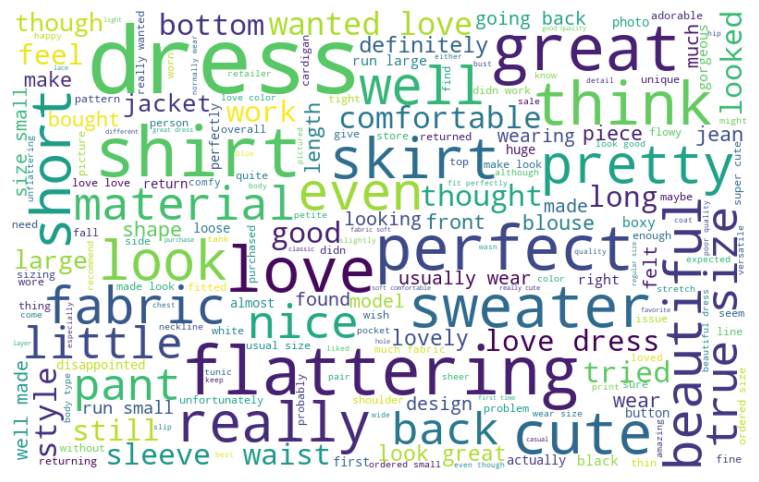

In [60]:
#Visualizing the Keywords
all_words = " ".join([sentence for sentence in df_upsampled["Cleaned_Review"]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

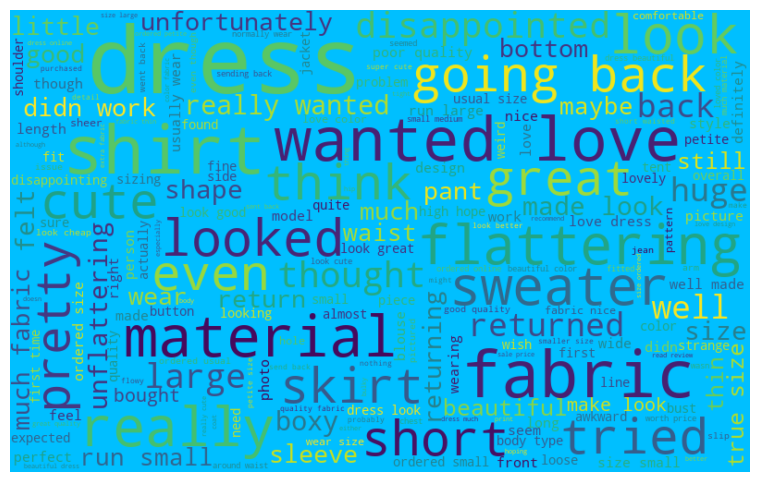

In [61]:
#Frequent words visualization for negative label
all_words = " ".join([sentence for sentence in df_upsampled["Cleaned_Review"][df_upsampled["Recommended"]==0]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='deepskyblue', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
# plt.title("Negative Reveiw")
plt.axis("off")
plt.show()

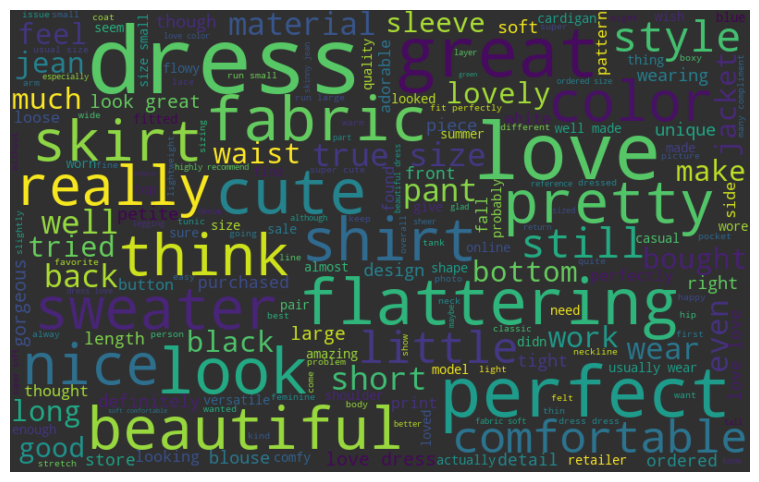

In [62]:
#Frequent words visualization for Positive Review
all_words = " ".join([sentence for sentence in df_upsampled["Cleaned_Review"][df_upsampled["Recommended"]==1]]) #Combines all the sentences into a single string

from wordcloud import WordCloud
wordcloud = WordCloud(background_color = '#303030', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

#Plotting the graph
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
# plt.title(label="Positive_Reveiw",
#           fontsize=20,
#           color="green")
plt.axis("off")
plt.show()

# Splitting data

In [64]:
#importing 
from sklearn.model_selection import train_test_split

#from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [65]:
x = df_upsampled["Cleaned_Review"]
y= df_upsampled["Recommended"]

In [66]:
#tokenization

from keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)

In [69]:
#padding 

from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen=50
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [70]:
#train_test splot
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

# Supervised Models

In [71]:
accuracy_list = []
f1_list = []
roc_auc_list = []

In [77]:
def result(model):
    
    #fit on data
    model.fit(x_train, y_train)
    
    #prediction
    pred = model.predict(x_test)
    
    #performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    #accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()
    
    #f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()

    #roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
    #confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
#     plt.title('Confusion Matrix', fontsize=20)

## Logistic Regression

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.35      0.43      3108
           1       0.54      0.72      0.62      3219

    accuracy                           0.54      6327
   macro avg       0.54      0.54      0.52      6327
weighted avg       0.54      0.54      0.52      6327

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.5413308044886992
----------------------------------------------------------------------------------------------------

F1 Score:  0.6165433403805497
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.6165433403805497
----------------------------------------------------------------------------------------------------



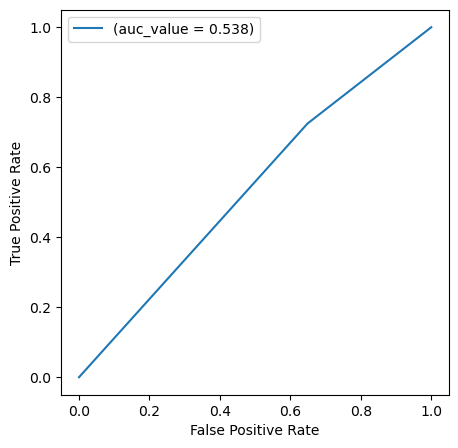


Confusion Matrix: 


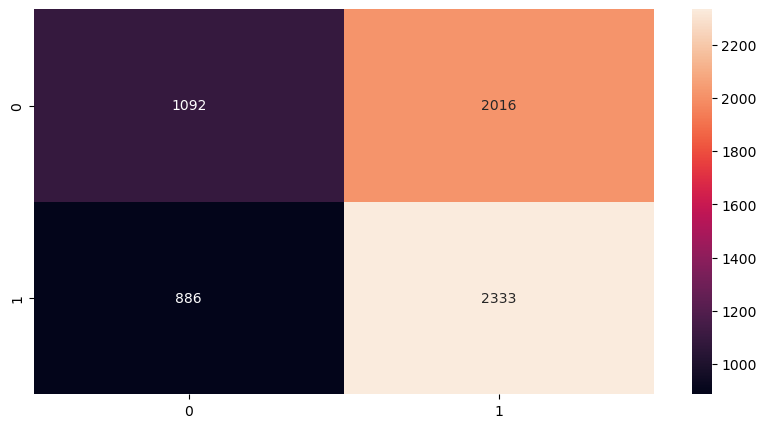

In [78]:

lr = LogisticRegression()
result(lr)

## RandomForest

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3108
           1       0.98      0.96      0.97      3219

    accuracy                           0.97      6327
   macro avg       0.97      0.97      0.97      6327
weighted avg       0.97      0.97      0.97      6327

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9696538643907064
----------------------------------------------------------------------------------------------------

F1 Score:  0.9699812382739211
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9699812382739211
----------------------------------------------------------------------------------------------------



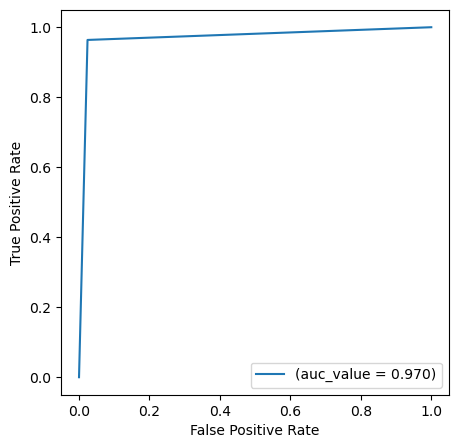


Confusion Matrix: 


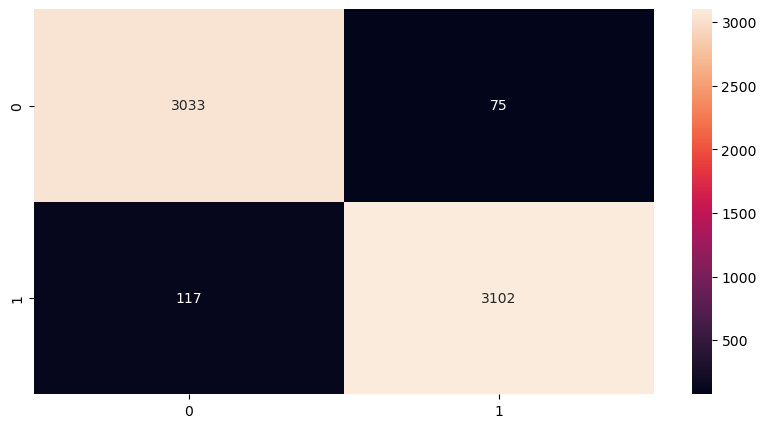

In [79]:
rf = RandomForestClassifier(criterion = 'entropy', random_state = 42)
result(rf)

## Naive Bayes

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.77      0.62      3108
           1       0.59      0.33      0.42      3219

    accuracy                           0.54      6327
   macro avg       0.56      0.55      0.52      6327
weighted avg       0.56      0.54      0.52      6327

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.5440177019124387
----------------------------------------------------------------------------------------------------

F1 Score:  0.4210315071242224
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.4210315071242224
----------------------------------------------------------------------------------------------------



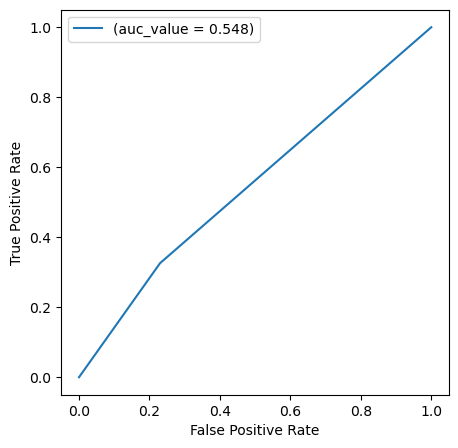


Confusion Matrix: 


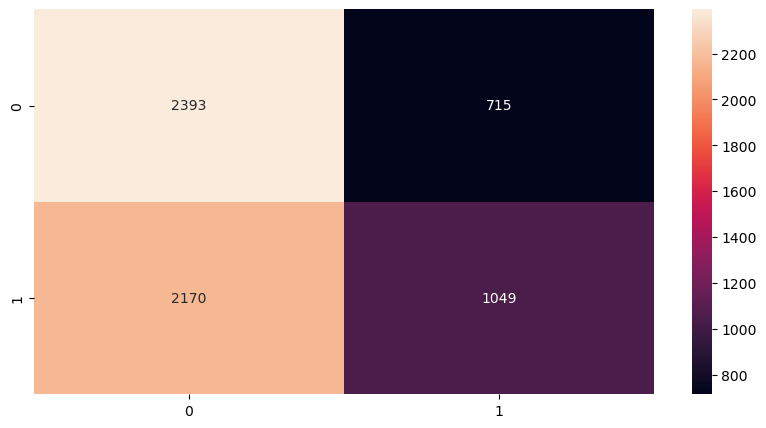

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result(nb)

## SVM

In [81]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

# LSTM MODEL

In [82]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2


model=Sequential()

model.add(Embedding(input_dim=num_words,output_dim=32,input_length=maxlen))

model.add(LSTM(units=64,dropout=0.4,return_sequences=True))
model.add(LSTM(units=64,dropout=0.4,return_sequences=True))

Dense(16, activation='relu')

model.add(LSTM(units=20))
model.add(Dropout(0.5))


model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 20)                6800      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 384,677
Trainable params: 384,677
Non-trai

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [84]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test , y_test), callbacks= [early_stop])

Epoch 1/20
791/791 [==============================] - 84s 90ms/step - loss: 0.3592 - accuracy: 0.8406 - val_loss: 0.2289 - val_accuracy: 0.9134
Epoch 2/20
791/791 [==============================] - 68s 86ms/step - loss: 0.2189 - accuracy: 0.9246 - val_loss: 0.2116 - val_accuracy: 0.9222
Epoch 3/20
791/791 [==============================] - 71s 90ms/step - loss: 0.1813 - accuracy: 0.9399 - val_loss: 0.2023 - val_accuracy: 0.9306
Epoch 4/20
791/791 [==============================] - 71s 90ms/step - loss: 0.1535 - accuracy: 0.9483 - val_loss: 0.1972 - val_accuracy: 0.9333
Epoch 5/20
791/791 [==============================] - 77s 97ms/step - loss: 0.1395 - accuracy: 0.9535 - val_loss: 0.2236 - val_accuracy: 0.9320
Epoch 6/20
791/791 [==============================] - 74s 93ms/step - loss: 0.1177 - accuracy: 0.9617 - val_loss: 0.1908 - val_accuracy: 0.9322
Epoch 7/20
791/791 [==============================] - 73s 92ms/step - loss: 0.1112 - accuracy: 0.9638 - val_loss: 0.1947 - val_accuracy:

In [85]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
cr = classification_report(y_test,predictions)
print(cr)

198/198 [==============================] - 7s 25ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3108
           1       0.97      0.91      0.94      3219

    accuracy                           0.94      6327
   macro avg       0.94      0.94      0.94      6327
weighted avg       0.94      0.94      0.94      6327



In [120]:
#performance of model
print("Classification Report: \n", classification_report(y_test, predictions))
print("-" * 100)
print()
    
#accuracy of model
acc = accuracy_score(y_test, predictions)
accuracy_list.append(acc)
print("Accuracy Score: ", acc)
print("-" * 100)
print()
    
#f1-score of model
f1 = f1_score(y_test, predictions)
f1_list.append(f1)
print("F1 Score: ", f1)
print("-" * 100)
print()

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3108
           1       0.95      0.93      0.94      3219

    accuracy                           0.94      6327
   macro avg       0.94      0.94      0.94      6327
weighted avg       0.94      0.94      0.94      6327

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9402560455192034
----------------------------------------------------------------------------------------------------

F1 Score:  0.9404161412358133
----------------------------------------------------------------------------------------------------



# Evaluation Table

In [88]:
classifier_list = ["Logistic Regression", "Random Forest", "KNN" , "Naive Bayes"]
list_class = []
for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], accuracy_list[i], f1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

IndexError: list index out of range

In [76]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "F1 Score")

Empty DataFrame
Columns: [Classifier, Accuracy, F1 Score, ROC-AUC Score]
Index: []

In [90]:
#doing a test prediction
test = ["This is unlike any kind of adventure movie my eyes have ever seen in such a long time, the characters, the musical score for every scene, the story, the beauty of the landscapes of Pandora, the rich variety and uniqueness of the flora and fauna of Pandora, the ways and cultures and language of the natives of Pandora, everything about this movie I am beyond impressed and truly captivated by. Sam Worthington is by far my favorite actor in this movie along with his character Jake Sulley, just as he was a very inspiring actor in The Shack Sam Worthington once again makes an unbelievable mark in one of the greatest and most captivating movies you'll ever see. "]

In [92]:
review = re.sub('[^a-zA-Z]', ' ', test[0])
review = review.lower()
review = review.split()
# review = [lemmatizze.lemmatize(word) for word in review if not word in stop_words]
test_processed =[ ' '.join(review)]

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer#tf idf
tf_idf = TfidfVectorizer()

test_input = tf_idf.transform(test_processed)
test_input.shape  #It also has 65498 features.

NotFittedError: The TF-IDF vectorizer is not fitted

In [94]:
#0= bad review
#1= good review
res=model.predict('I wanted to love this jump')[0]
if res==1:
    print("Good Review")
elif res==0:
    print("Bad Review")

IndexError: tuple index out of range